<h1>📑 Оглавление</h1>
<ul>
  <li><a href="#📊-Линейная-регрессия">📊 Линейная регрессия</a>
    <ul>
      <li><a href="#🛠-Псевдокод-для-алгоритма-линейной-регрессии">🛠 Псевдокод для алгоритма линейной регрессии</a>
        <ul>
          <li><a href="#📐-Псевдокод-простого-подхода-алгоритма-линейной-регрессии">📐 Псевдокод простого подхода алгоритма линейной регрессии</a></li>
          <li><a href="#💻-Код-простого-подхода">💻 Код простого подхода</a></li>
          <li><a href="#🔍-Наблюдения-для-абсолютного-подхода">🔍 Наблюдения для абсолютного подхода</a></li>
          <li><a href="#📐-Псевдокод-абсолютного-подхода-алгоритма-линейной-регрессии">📐 Псевдокод абсолютного подхода алгоритма линейной регрессии</a></li>
          <li><a href="#💻-Код-абсолютного-подхода">💻 Код абсолютного подхода</a></li>
          <li><a href="#🔍-Наблюдения-для-квадратического-подхода">🔍 Наблюдения для квадратического подхода</a></li>
          <li><a href="#📐-Псевдокод-квадратического-подхода-алгоритма-линейной-регрессии">📐 Псевдокод квадратического подхода алгоритма линейной регрессии</a></li>
          <li><a href="#💻-Код-квадратического-подхода">💻 Код квадратического подхода</a></li>
        </ul>
      </li>
      <li><a href="#💾-Код-алгоритма-линейной-регрессии-на-основе-трёх-подходов">💾 Код алгоритма линейной регрессии на основе трёх подходов</a></li>
    </ul>
  </li>
  <li><a href="#📥-Загрузка-данных-и-построение-графиков">📥 Загрузка данных и построение графиков</a>
    <ul>
      <li><a href="#📈-Построение-графиков">📈 Построение графиков</a></li>
      <li><a href="#⚙️-Функции-ошибок">⚙️ Функции ошибок</a></li>
      <li><a href="#🏡-Пример-набора-данных-(цены-на-жильё)">🏡 Пример набора данных (цены на жильё)</a></li>
    </ul>
  </li>
  <li><a href="#🤖-Использование-Scikit-Learn">🤖 Использование Scikit-Learn</a></li>
  <li><a href="#📊-Сравнение-результатов">📊 Сравнение результатов</a></li>
</ul>


# 📊 Линейная регрессия

## 🛠 Псевдокод для алгоритма линейной регрессии

**Входные данные** - набор данных точек.  
**Результат** - модель линейной регрессии, соответствующая этому набору данных.

**Процедура**:
- Выберите модель со случайными весами и случайным смещением.
- Повторяйте многократно:
  - выберите случайную точку данных;
  - слегка отрегулируйте веса и смещение, чтобы улучшить прогноз для конкретной точки данных.

**Возврат** - полученная модель.

---

**Общий вид уравнения прямой линии (на примере прогноза цены жилья)**:

Пусть общее уравнение прямой: $y = mx + b$
* $(x, y)$ - соответсвуют координатам по горизонтали и вертикали
* $k$ - коэффициент, влияющий на угол наклона прямой  
* $b$ - коэффициент, показывающий, где прямая пересекает ось Y


Уравнение в виде $\hat{p} = mr + b$:
* $\hat{p}$ - прогнозируемая цена жилья
* $r$ - количество комнат (признак)
* $m$ (наклон) - цена за комнату
* $b$ (Y-пересечение) - базовая цена дома

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox
from matplotlib.patches import Arc

In [2]:
def plot_line(k=1.0, b=0.0, show_y_intercept=True, show_angle=True):
    """
    Отображает прямую линию с возможностью показать Y-пересечение и угол наклона.

    Параметры:
    ----------
    k : float, optional
        Угловой коэффициент (наклон линии), по умолчанию 1.0.
    b : float, optional
        Y-пересечение (сдвиг по Y), по умолчанию 0.0.
    show_y_intercept : bool, optional
        Отображать ли точку пересечения с осью Y, по умолчанию True.
    show_angle : bool, optional
        Отображать ли угол наклона θ, по умолчанию True.

    Особенности:
    ------------
    - При включенном show_angle пересечение по Y принудительно устанавливается в 0.
    - Отображается уравнение прямой.
    - Отображается угол θ в градусах.
    """
    # Если выбрана опция показать угол - принудительно b = 0
    if show_angle:
        b = 0.0

    # Построение прямой
    x = np.linspace(-10, 10, 100)
    y = k * x + b

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, color='blue', label='Линия y = kx + b')

    # Оси координат
    plt.axhline(0, color='gray', lw=1)
    plt.axvline(0, color='gray', lw=1)

    # Отображение Y-пересечения, если включено и угол не отображается
    if show_y_intercept and not show_angle:
        plt.scatter(0, b, color='green', s=100,
                    label=f'Y-пересечение (0, {b:.2f})', zorder=5)

    # Добавление текста уравнения на график
    equation_text = f'Уравнение:\ny = {k:.2f}x + {b:.2f}'
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
             fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Отображение угла наклона θ
    if show_angle:
        theta_rad = np.arctan(k)
        theta_deg = np.degrees(theta_rad)

        arc = Arc((0, 0), 4, 4, theta1=0, theta2=theta_deg,
                  edgecolor='red', lw=2)
        plt.gca().add_patch(arc)

        # Подпись угла
        plt.text(2, 0.5, f'θ ≈ {theta_deg:.1f}°', color='red', fontsize=12)

    # Настройки графика
    plt.title("График прямой линии")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.ylim(-20, 20)
    plt.xlim(-10, 10)
    plt.show()

In [3]:
# Интерфейс с ползунками и галочками
interact(
    plot_line,
    k=FloatSlider(value=1.0, min=-15.0, max=15.0, step=0.1, description='k (наклон)'),
    b=FloatSlider(value=2.0, min=-15.0, max=15.0, step=0.5, description='b (сдвиг)'),
    show_y_intercept=Checkbox(value=True, description='Показать Y-пересечение'),
    show_angle=Checkbox(value=False, description='Показать угол наклона')
)

interactive(children=(FloatSlider(value=1.0, description='k (наклон)', max=15.0, min=-15.0), FloatSlider(value…

<function __main__.plot_line(k=1.0, b=0.0, show_y_intercept=True, show_angle=True)>

### 📐 Псевдокод простого подхода алгоритма линейной регрессии

**Дано:**
- Линия: $\hat{p} = mr + b$
- Точка: $(r, p)$

---

**Шаг 1. Маленькие шаги обновления**
Выбираем:
- $\eta_1$ — изменение наклона  
- $\eta_2$ — изменение сдвига  

*(оба очень маленькие)*

---

**Шаг 2. Сценарии корректировки**

| Сценарий  | Точка находится                  | Действие с прямой                                     | Новые параметры                      |
|-----------|--------------------------|-----------------------------------------------|--------------------------------------|
| 1         | **Над** прямой, **справа** от Y   | Повернуть **против** часовой стрелки и **поднять**   | $m' = m + \eta_1$<br>$b' = b + \eta_2$ |
| 2         | **Над** прямой, **слева** от Y    | Повернуть **по** часовой стрелке и **поднять**       | $m' = m - \eta_1$<br>$b' = b + \eta_2$ |
| 3         | **Ниже** прямой, **справа** от Y  | Повернуть **по** часовой стрелке и **опустить**      | $m' = m - \eta_1$<br>$b' = b - \eta_2$ |
| 4         | **Ниже** прямой, **слева** от Y   | Повернуть **против** часовой стрелки и **опустить**  | $m' = m + \eta_1$<br>$b' = b - \eta_2$ |

---

**Итог:**
- Возвращаем новую линию, которая будет ближе к точке: $\hat{p} = m'r + b'$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, RadioButtons

In [5]:
def update_line(position):
    """
    Визуализирует процесс обновления линии регрессии в зависимости от положения точки.

    Параметры:
    ----------
    position : str
        Ключ из словаря positions, представляющий выбранную точку.

    Сценарии:
    ---------
    1. Точка выше линии и справа от оси Y → увеличить наклон и смещение.
    2. Точка выше линии и слева от оси Y → уменьшить наклон, увеличить смещение.
    3. Точка ниже линии и справа от оси Y → уменьшить наклон и смещение.
    4. Точка ниже линии и слева от оси Y → увеличить наклон, уменьшить смещение.
    """
    x_point, y_point = positions[position]
    k = k_init
    b = b_init

    # Исходная линия
    def line(x):
        return k * x + b

    y_line = line(x_point)

    plt.figure(figsize=(8, 5))
    x_vals = np.linspace(-10, 10, 100)
    plt.plot(x_vals, line(x_vals), label=f'Исходная: y = {k:.2f}x + {b:.2f}')
    plt.scatter(x_point, y_point, color='red', s=100, label=f'Точка: {x_point}, {y_point}')

    # Логика сценариев обновления
    if y_point > y_line and x_point > 0:
        k_new = k + eta1
        b_new = b + eta2
        scenario = "Сценарий 1: Над прямой, справа от Y"
    elif y_point > y_line and x_point <= 0:
        k_new = k - eta1
        b_new = b + eta2
        scenario = "Сценарий 2: Над прямой, слева от Y"
    elif y_point < y_line and x_point > 0:
        k_new = k - eta1
        b_new = b - eta2
        scenario = "Сценарий 3: Ниже прямой, справа от Y"
    else:
        k_new = k + eta1
        b_new = b - eta2
        scenario = "Сценарий 4: Ниже прямой, слева от Y"

    # Новая линия после обновления
    def new_line(x):
        return k_new * x + b_new

    plt.plot(
        x_vals, new_line(x_vals),
        label=fr'Новая: $\hat{{y}}$ = {k_new:.2f}x + {b_new:.2f}',
        linestyle='--'
    )

    # Оформление графика
    plt.title(scenario, fontsize=14)
    plt.axhline(0, color='gray', lw=1)
    plt.axvline(0, color='gray', lw=1)
    plt.legend()
    plt.grid(True)
    plt.ylim(-20, 20)
    plt.show()

In [6]:
# Начальные параметры линии
k_init = 0.1
b_init = 2.0

# Маленькие шаги (эта)
eta1 = 0.5
eta2 = 1

# Возможные позиции точки
positions = {
    '"Сценарий 1" (5, 10)': (5, 10),
    '"Сценарий 2" (-5, 10)': (-5, 10),
    '"Сценарий 3" (5, -10)': (5, -10),
    '"Сценарий 4" (-5, -10)': (-5, -10),
}

# Интерфейс с выбором фиксированных координат в виде RadioButtons
interact(
    update_line,
    position=RadioButtons(
        options=list(positions.keys()),
        description='Точка:'
    )
)

interactive(children=(RadioButtons(description='Точка:', options=('"Сценарий 1" (5, 10)', '"Сценарий 2" (-5, 1…

<function __main__.update_line(position)>

### 💻 Код простого подхода

In [7]:
def simple_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate_slope, learning_rate_shift):
    """
    Простой подход для корректировки линии линейной регрессии.

    Параметры:
    -----------
    base_price : float
        Текущее значение Y-пересечения (b).
    price_per_room : float
        Текущий наклон линии (m).
    num_rooms : float
        Количество комнат (r).
    actual_price : float
        Реальная цена (p).
    learning_rate_slope : float
        Шаг изменения наклона (η₁).
    learning_rate_shift : float
        Шаг изменения сдвига (η₂).

    Возвращает:
    ------------
    tuple of float
        Обновленные значения наклона и пересечения (m', b').
    """
    # Шаг 1. Предсказание цены
    predicted_price = base_price + price_per_room * num_rooms  # hat(p) = mr + b

    # Шаг 2. Определение сценария и обновление параметров
    if actual_price > predicted_price and num_rooms >= 0:
        # Сценарий 1: Над линией и справа от Y
        price_per_room += learning_rate_slope
        base_price += learning_rate_shift

    elif actual_price > predicted_price and num_rooms < 0:
        # Сценарий 2: Над линией и слева от Y
        price_per_room -= learning_rate_slope
        base_price += learning_rate_shift

    elif actual_price <= predicted_price and num_rooms >= 0:
        # Сценарий 3: Ниже линии и справа от Y
        price_per_room -= learning_rate_slope
        base_price -= learning_rate_shift

    else:
        # Сценарий 4: Ниже линии и слева от Y
        price_per_room += learning_rate_slope
        base_price -= learning_rate_shift

    return price_per_room, base_price

### 🔍 Наблюдения для абсолютного подхода

В **простом подходе** использовались 4 сценария, основанных на положении точки и её координате $r$.  
**Абсолютный подход** упрощает логику до **двух универсальных сценариев**, игнорируя знак $r$, и корректирует наклон и пересечение **по одинаковой схеме**, исходя только из того, находится ли точка **над** или **ниже** линии.

---

**📌 Наблюдение 1. Ошибка прогноза $(p - \hat{p})$**
- Если точка **над прямой** → $(p - \hat{p})$ положительное.
- Если точка **ниже прямой** → $(p - \hat{p})$ отрицательное.

---

**📌 Наблюдение 2. Обновление Y-пересечения**
- Если точка **выше линии** → пересечение $b$ увеличивается (чтобы поднять линию).
- Если точка **ниже линии** → пересечение $b$ уменьшается (чтобы опустить линию).
  
**Итог**:
- Добавляем или вычитаем фиксированное значение $\eta$, в зависимости от положения точки:
  - $b' = b + \eta$ если $p > \hat{p}$
  - $b' = b - \eta$ если $p < \hat{p}$

---

**📌 Наблюдение 3. Корректировка наклона**
- В **абсолютном подходе** наклон $m$ всегда корректируется **в одну сторону** независимо от знака $r$:
  - $m' = m + \eta r$ как при сценарии 1, так и при сценарии 2.
  
Это означает:
- Вращаем линию **всегда в сторону точки**, но знак $r$ сам определяет направление вращения:
  - Если $r$ положительное → $m$ увеличивается.
  - Если $r$ отрицательное → $m$ уменьшается.

---

**💡 Итог**
**Абсолютный подход** — это простое обобщение:
- Учитывает только **два сценария** (выше или ниже линии).
- Обновляет $m$ и $b$ **с фиксированным шагом**, игнорируя масштаб ошибки.
- При этом знак $r$ автоматически корректирует направление вращения.


### 📐 Псевдокод абсолютного подхода алгоритма линейной регрессии

**Дано:**
- Линия: $\hat{p} = mr + b$
- Точка: $(r, p)$

---

**Шаг 1. Параметры обновления**
Выбираем:
- $\eta$ — скорость обучения *(маленькое положительное число)*

---

**Шаг 2. Сценарии корректировки**

| Сценарий  | Точка находится                  | Действие с прямой                                     | Новые параметры                      |
|-----------|--------------------------|-----------------------------------------------|--------------------------------------|
| 1         | **Над** прямой, т.е. $(p > \hat{p})$  | Повернуть и **поднять**   | $m' = m + \eta r$<br>$b' = b + \eta$ |
| 2         | **Ниже** прямой, т.е. $(p < \hat{p})$ | Повернуть и **опустить**  | $m' = m + \eta r$<br>$b' = b - \eta$ |

---

**Итог:**
- Возвращаем новую линию, которая будет ближе к точке: $\hat{p} = m'r + b'$

### 💻 Код абсолютного подхода

In [8]:
def absolute_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate):
    """
    Абсолютный подход для корректировки линии линейной регрессии.

    Параметры:
    -----------
    base_price : float
        Текущее значение Y-пересечения (b).
    price_per_room : float
        Текущий наклон линии (m).
    num_rooms : float
        Количество комнат (r).
    actual_price : float
        Реальная цена (p).
    learning_rate : float
        Скорость обучения (η).

    Возвращает:
    ------------
    tuple of float
        Обновленные значения наклона и пересечения (m', b').
    """
    # Шаг 1. Предсказание цены
    predicted_price = base_price + price_per_room * num_rooms  # hat(p) = mr + b

    # Шаг 2. Проверка положения точки и корректировка линии
    if actual_price > predicted_price:
        # Точка выше линии → вращаем против часовой стрелки и поднимаем линию
        price_per_room += learning_rate * num_rooms  # m' = m + ηr
        base_price += learning_rate  # b' = b + η
    else:
        # Точка ниже линии → вращаем по часовой стрелке и опускаем линию
        price_per_room -= learning_rate * num_rooms  # m' = m - ηr
        base_price -= learning_rate  # b' = b - η

    return price_per_room, base_price

### 🔍 Наблюдения для квадратического подхода

В **простом подходе** использовались 4 сценария, основанных на положении точки относительно прямой.  
**Квадратический подход** сводит все эти случаи к **одной универсальной формуле**, автоматически определяя нужные знаки (+ или -), чтобы линия всегда приближалась к точке.

---

**📌 Наблюдение 1. Поведение Y-пересечения в простом подходе**
- Если точка **над прямой** → добавляем небольшое значение к $b$ (Y-пересечению).
- Если точка **ниже прямой** → вычитаем небольшое значение из $b$.

---

**📌 Наблюдение 2. Ошибка прогноза $(p - \hat{p})$**
- Если точка **выше прямой** → $(p - \hat{p})$ положительное.
- Если точка **ниже прямой** → $(p - \hat{p})$ отрицательное.

---

**💡 Вывод**
Объединяя оба наблюдения:
- При добавлении **ошибки прогноза** $(p - \hat{p})$ к Y-пересечению:
  - Линия **поднимается**, если точка **выше**.
  - Линия **опускается**, если точка **ниже**.

Таким образом, добавляя $\eta (p - \hat{p})$ к $b$, мы всегда направляем линию **в сторону точки**, независимо от её положения.

---

**📌 Наблюдение 3. Вращение прямой в простом подходе**
- В **сценариях 1 и 4** (точка **выше** прямой и **справа от Y**, либо **ниже** прямой и **слева от Y**) → вращаем **против часовой стрелки** (увеличиваем наклон $m$).
- В **сценариях 2 и 3** → вращаем **по часовой стрелке** (уменьшаем наклон $m$).

---

**📌 Наблюдение 4. Знак координаты $r$**
- Если точка **справа от оси Y** → $r$ положительное.
- Если точка **слева от оси Y** → $r$ отрицательное.

---

**💡 Вывод**
Рассмотрим произведение $r(p - \hat{p})$:
- Оно **положительно**, когда:
  - Точка **справа от Y**, и находится **выше** линии (сценарий 1).
  - Точка **слева от Y**, и находится **ниже** линии (сценарий 4).
  
  В обоих случаях по простому подходу мы должны увеличивать наклон — всё совпадает.

- Оно **отрицательно**, когда:
  - Точка **справа от Y**, и находится **ниже** линии (сценарий 3).
  - Точка **слева от Y**, и находится **выше** линии (сценарий 2).

Таким образом:
- Добавляя $\eta r (p - \hat{p})$ к $m$, мы **автоматически корректируем наклон** в нужную сторону для любого положения точки.

### 📐 Псевдокод квадратического подхода алгоритма линейной регрессии

**Дано:**
- Линия: $\hat{p} = mr + b$
- Точка: $(r, p)$

---

**Шаг 1. Параметры обновления**
Выбираем:
- $\eta$ — скорость обучения *(маленькое положительное число)*

**Условное обозначение:**
- $(p - \hat{p})$ — ошибка прогноза (разница между реальной и предсказанной ценой)

---

**Шаг 2. Корректировка линии**

| Действие           | Формула обновления                          |
|---------------------|---------------------------------------------|
| Вращаем прямую      | $m' = m + \eta r (p - \hat{p})$            |
| Сдвигаем прямую     | $b' = b + \eta (p - \hat{p})$              |

---

**Итог:**
- Возвращаем новую линию, которая будет ближе к точке: $\hat{p} = m' r + b'$

### 💻 Код квадратического подхода

In [9]:
def square_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate):
    """
    Квадратический подход для корректировки линии линейной регрессии.

    Параметры:
    -----------
    base_price : float
        Текущее значение Y-пересечения (b).
    price_per_room : float
        Текущий наклон линии (m).
    num_rooms : float
        Количество комнат (r).
    actual_price : float
        Реальная цена (p).
    learning_rate : float
        Скорость обучения (η).

    Возвращает:
    ------------
    tuple of float
        Обновленные значения наклона и пересечения (m', b').
    """
    # Шаг 1. Предсказание цены
    predicted_price = base_price + price_per_room * num_rooms  # hat(p) = mr + b

    # Шаг 2. Вычисление ошибки прогноза
    error = actual_price - predicted_price  # (p - hat(p))

    # Шаг 3. Обновление Y-пересечения (b)
    base_price += learning_rate * error  # b' = b + η (p - hat(p))

    # Шаг 4. Обновление наклона (m)
    price_per_room += learning_rate * num_rooms * error  # m' = m + η r (p - hat(p))

    return price_per_room, base_price

## 💾 Код алгоритма линейной регрессии на основе трёх подходов

In [10]:
import random
import numpy as np

In [11]:
def linear_regression(features, labels, learning_rate=0.01, epochs=1000, method="simple"):
    """
    Линейная регрессия с выбором подхода для корректировки линии.

    Параметры:
    ------------
    features : list[float] or np.ndarray
        Список входных признаков (например, количество комнат).
    labels : list[float] or np.ndarray
        Список соответствующих реальных цен.
    learning_rate : float, optional
        Скорость обучения для всех параметров (по умолчанию 0.01).
    epochs : int, optional
        Количество итераций обучения (по умолчанию 1000).
    method : str, optional
        Подход для обновления линии. Доступные варианты:
        - "simple" — простой подход.
        - "absolute" — абсолютный подход.
        - "square" — квадратический подход.

    Возвращает:
    ------------
    tuple:
        all_lines : list of tuple (m, b)
            История линий после каждой итерации.
        price_per_room : float
            Финальное значение наклона (m).
        base_price : float
            Финальное значение пересечения (b).
        mae_list : list[float]
            Список MAE (Mean Absolute Error) по эпохам.
        mse_list : list[float]
            Список MSE (Mean Squared Error) по эпохам.
        rmse_list : list[float]
            Список RMSE (Root Mean Squared Error) по эпохам.
    """
    # Преобразование в numpy массивы для удобства
    features = np.array(features)
    labels = np.array(labels)

    # Шаг 1. Инициализация случайных параметров
    price_per_room = random.random()
    base_price = random.random()

    all_lines = []
    mae_list = []
    mse_list = []
    rmse_list = []

    # Шаг 2. Итеративное обновление параметров
    for epoch in range(epochs):
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        actual_price = labels[i]

        # Выбор метода обновления
        if method == "simple":
            price_per_room, base_price = simple_trick(
                base_price=base_price,
                price_per_room=price_per_room,
                num_rooms=num_rooms,
                actual_price=actual_price,
                learning_rate_slope=learning_rate,
                learning_rate_shift=learning_rate
            )
        elif method == "absolute":
            price_per_room, base_price = absolute_trick(
                base_price=base_price,
                price_per_room=price_per_room,
                num_rooms=num_rooms,
                actual_price=actual_price,
                learning_rate=learning_rate
            )
        elif method == "square":
            price_per_room, base_price = square_trick(
                base_price=base_price,
                price_per_room=price_per_room,
                num_rooms=num_rooms,
                actual_price=actual_price,
                learning_rate=learning_rate
            )
        else:
            raise ValueError(f"Неверный метод: {method}. Доступные методы: 'simple', 'absolute', 'square'.")

        # Сохраняем параметры линии
        all_lines.append((price_per_room, base_price))

        # Считаем ошибки на всем наборе данных
        predictions = price_per_room * features + base_price
        mae_list.append(mae(labels, predictions))
        mse_list.append(mse(labels, predictions))
        rmse_list.append(rmse(labels, predictions))

    return all_lines, price_per_room, base_price, mae_list, mse_list, rmse_list

# 📥 Загрузка данных и построение графиков

## 📈 Построение графиков

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def plot_regression_progress(features, labels, all_lines, method="simple", n_lines=10):
    """
    Визуализация прогресса обучения линейной регрессии.

    Параметры:
    ------------
    features : array-like
        Входные признаки (например, количество комнат).
    labels : array-like
        Реальные значения (цены).
    all_lines : list of tuple
        Список кортежей (наклон, пересечение) на каждом шаге обучения.
    method : str, optional
        Метод обучения ('simple', 'absolute', 'square') (по умолчанию 'simple').
    n_lines : int, optional
        Количество промежуточных линий для отображения (по умолчанию 10).

    Описание:
    ------------
    Строит график с:
        - Исходными точками данных.
        - Промежуточными линиями регрессии.
        - Финальной обученной линией.
    """
    all_lines = np.array(all_lines)

    plt.figure(figsize=(18, 4))

    step = max(1, int(len(all_lines) / n_lines))

    # Рисуем промежуточные линии
    for line in all_lines[::step]:
        y_values = line[0] * features + line[1]
        plt.plot(features, y_values, color='orange', alpha=0.5, linestyle='--')

    # Рисуем финальную линию
    final_y_values = all_lines[-1, 0] * features + all_lines[-1, 1]
    plt.plot(features, final_y_values, color='red', label='Финальная линия')

    # Рисуем исходные точки данных
    plt.scatter(features, labels, color='blue', label='Точки данных', zorder=5)

    method_name = {
        "simple": "Простой подход",
        "absolute": "Абсолютный подход",
        "square": "Квадратический подход"
    }.get(method, "Неизвестный подход")

    plt.title(f"Прогресс линейной регрессии\n({method_name})")
    plt.xlabel("Количество комнат")
    plt.ylabel("Цена")
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
def plot_errors(mae_list, mse_list, rmse_list):
    """
    Визуализация ошибок MAE, MSE, RMSE в процессе обучения.

    Параметры:
    ------------
    mae_list : list[float]
        Список MAE по эпохам.
    mse_list : list[float]
        Список MSE по эпохам.
    rmse_list : list[float]
        Список RMSE по эпохам.
    """
    epochs = range(len(mae_list))
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))

    axs[0].plot(epochs, mae_list, color='blue')
    axs[0].set_title("MAE во время обучения")
    axs[0].set_xlabel("Эпохи")
    axs[0].set_ylabel("MAE")
    axs[0].grid(True)

    axs[1].plot(epochs, mse_list, color='green')
    axs[1].set_title("MSE во время обучения")
    axs[1].set_xlabel("Эпохи")
    axs[1].set_ylabel("MSE")
    axs[1].grid(True)

    axs[2].plot(epochs, rmse_list, color='red')
    axs[2].set_title("RMSE во время обучения")
    axs[2].set_xlabel("Эпохи")
    axs[2].set_ylabel("RMSE")
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

## ⚙️ Функции ошибок

In [15]:
import numpy as np

In [16]:
def mae(labels, predictions):
    """
    Вычисляет среднюю абсолютную ошибку (MAE) между фактическими и предсказанными значениями.

    Параметры:
    ------------
    labels : array-like
        Фактические значения (истинные метки).
    predictions : array-like
        Предсказанные значения модели.

    Возвращает:
    ------------
    float
        Значение средней абсолютной ошибки (MAE).
    """
    labels = np.array(labels)
    predictions = np.array(predictions)
    absolute_errors = np.abs(labels - predictions)
    return np.mean(absolute_errors)

In [17]:
def mse(labels, predictions):
    """
    Вычисляет среднюю квадратичную ошибку (MSE) между фактическими и предсказанными значениями.

    Параметры:
    ------------
    labels : array-like
        Фактические значения (истинные метки).
    predictions : array-like
        Предсказанные значения модели.

    Возвращает:
    ------------
    float
        Значение средней квадратичной ошибки (MSE).
    """
    labels = np.array(labels)
    predictions = np.array(predictions)
    squared_errors = (labels - predictions) ** 2
    return np.mean(squared_errors)

In [18]:
def rmse(labels, predictions):
    """
    Вычисляет корень средней квадратичной ошибки (RMSE) между фактическими и предсказанными значениями.

    Параметры:
    ------------
    labels : array-like
        Фактические значения (истинные метки).
    predictions : array-like
        Предсказанные значения модели.

    Возвращает:
    ------------
    float
        Значение RMSE.
    """
    labels = np.array(labels)
    predictions = np.array(predictions)
    mse_value = np.mean((labels - predictions) ** 2)
    return np.sqrt(mse_value)

## 🏡 Пример набора данных (цены на жильё)

In [19]:
import pandas as pd
import numpy as np

In [20]:
# Данные
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356, 407, 448])

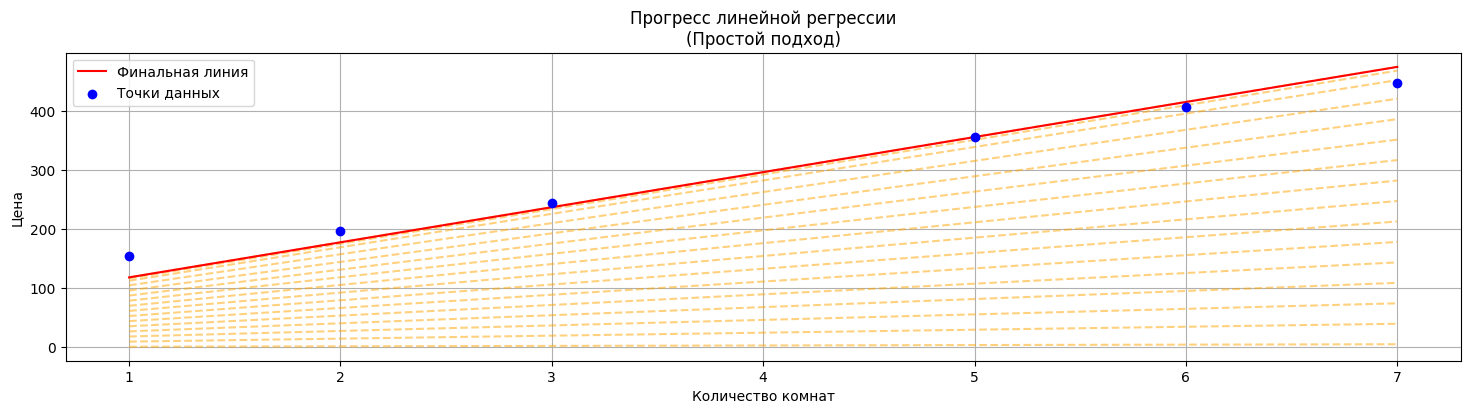

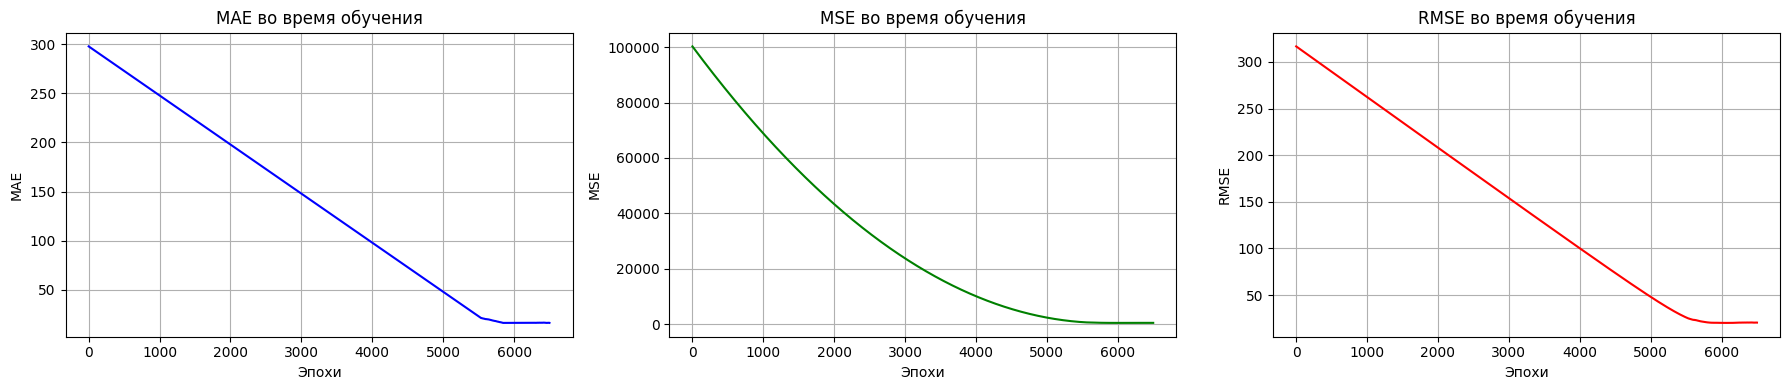

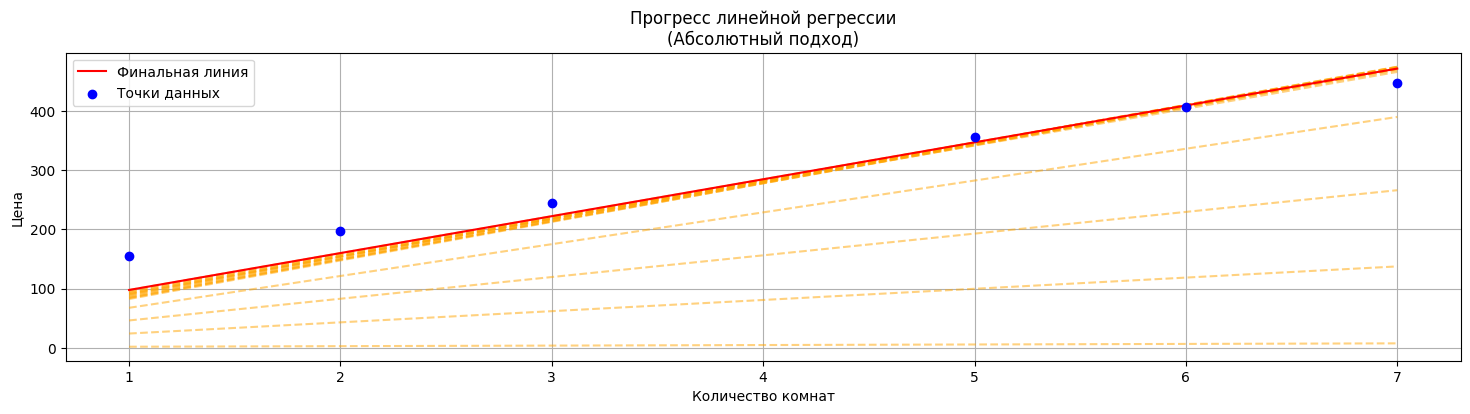

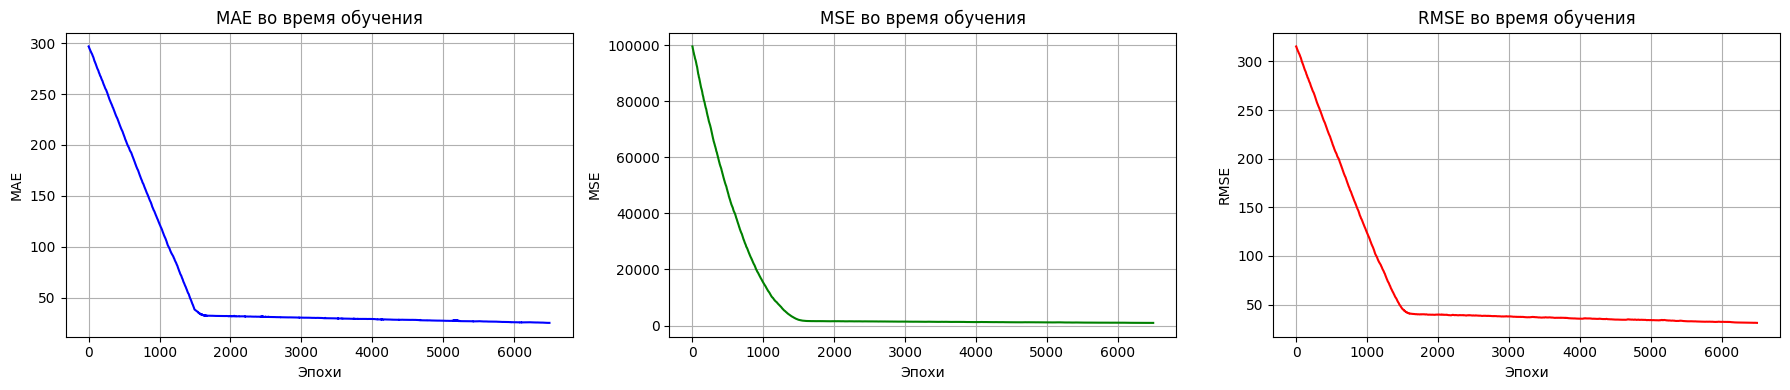

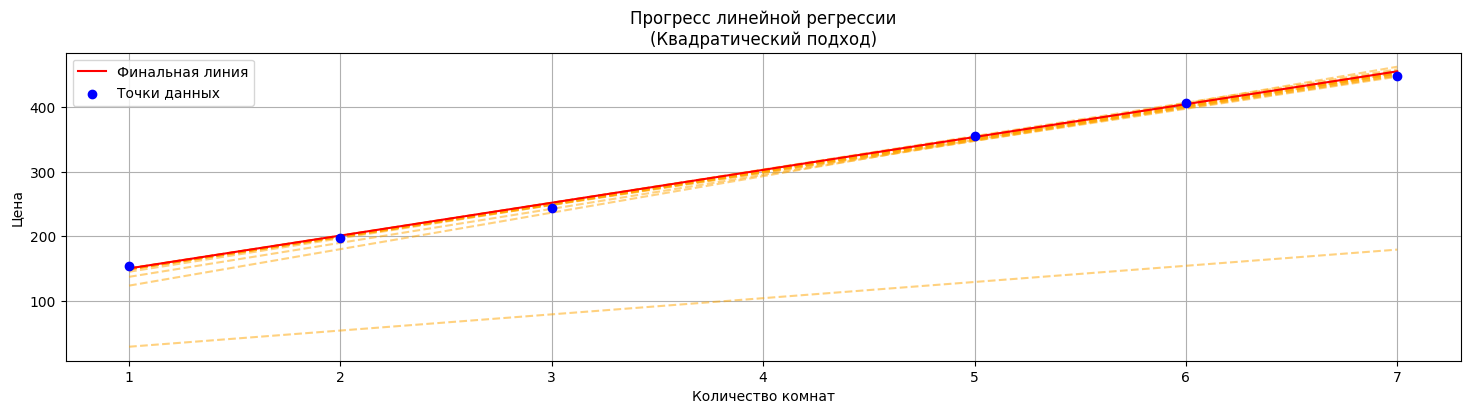

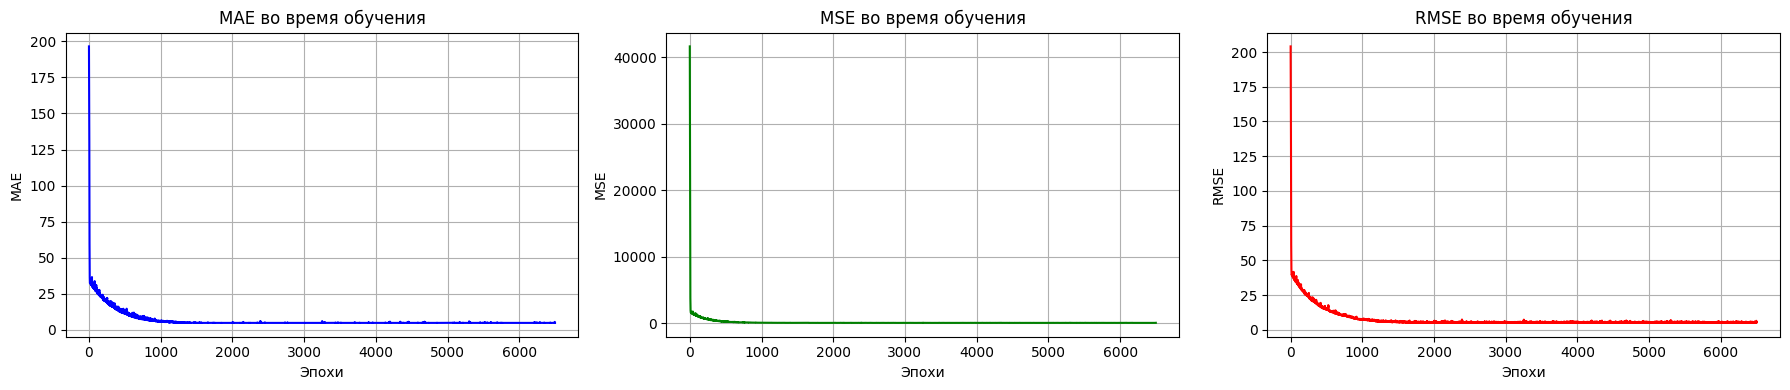

In [21]:
# Методы обучения
methods = ['simple', 'absolute', 'square']

# Список для хранения результатов
results = []

# Перебор методов
for method in methods:
    # Обучение модели
    all_lines, price_per_room, base_price, mae_list, mse_list, rmse_list = linear_regression(
        features=features,
        labels=labels,
        learning_rate=0.01,
        epochs=6500,
        method=method
    )

    # Предсказание для 4 комнат
    num_rooms = 4
    predicted_price = price_per_room * num_rooms + base_price

    # Сохранение результатов
    results.append({
        "Метод": method.capitalize(),
        "Коэффициент (наклон)": price_per_room,
        "Y-пересечение": base_price,
        "Предсказанная цена для 4 комнат": predicted_price,
        "MAE": mae_list[-1],
        "MSE": mse_list[-1],
        "RMSE": rmse_list[-1]
    })

    # Визуализация прогресса обучения и ошибок
    plot_regression_progress(features, labels, all_lines, method=method, n_lines=15)
    plot_errors(mae_list, mse_list, rmse_list)

# 🤖 Использование Scikit-Learn

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Исходные данные
features = np.array([1, 2, 3, 5, 6, 7]).reshape(-1, 1)  # sklearn ожидает 2D массив
labels = np.array([155, 197, 244, 356, 407, 448])

In [24]:
# Инициализация и обучение модели
model = LinearRegression()
model.fit(features, labels)

# Предсказания на обучающем наборе
predictions = model.predict(features)

# Расчет метрик ошибок
mae_value = mean_absolute_error(labels, predictions)
mse_value = mean_squared_error(labels, predictions)
rmse_value = np.sqrt(mse_value)

# Предсказание для количества комнат = 4
rooms_to_predict = 4
predicted_price = model.predict(np.array([[rooms_to_predict]]))  # 2D массив

# Добавление результатов scikit-learn в общий список результатов
results.append({
    "Метод": "Scikit-Learn",
    "Коэффициент (наклон)": model.coef_[0],
    "Y-пересечение": model.intercept_,
    "Предсказанная цена для 4 комнат": predicted_price[0],
    "MAE": mae_value,
    "MSE": mse_value,
    "RMSE": rmse_value
})

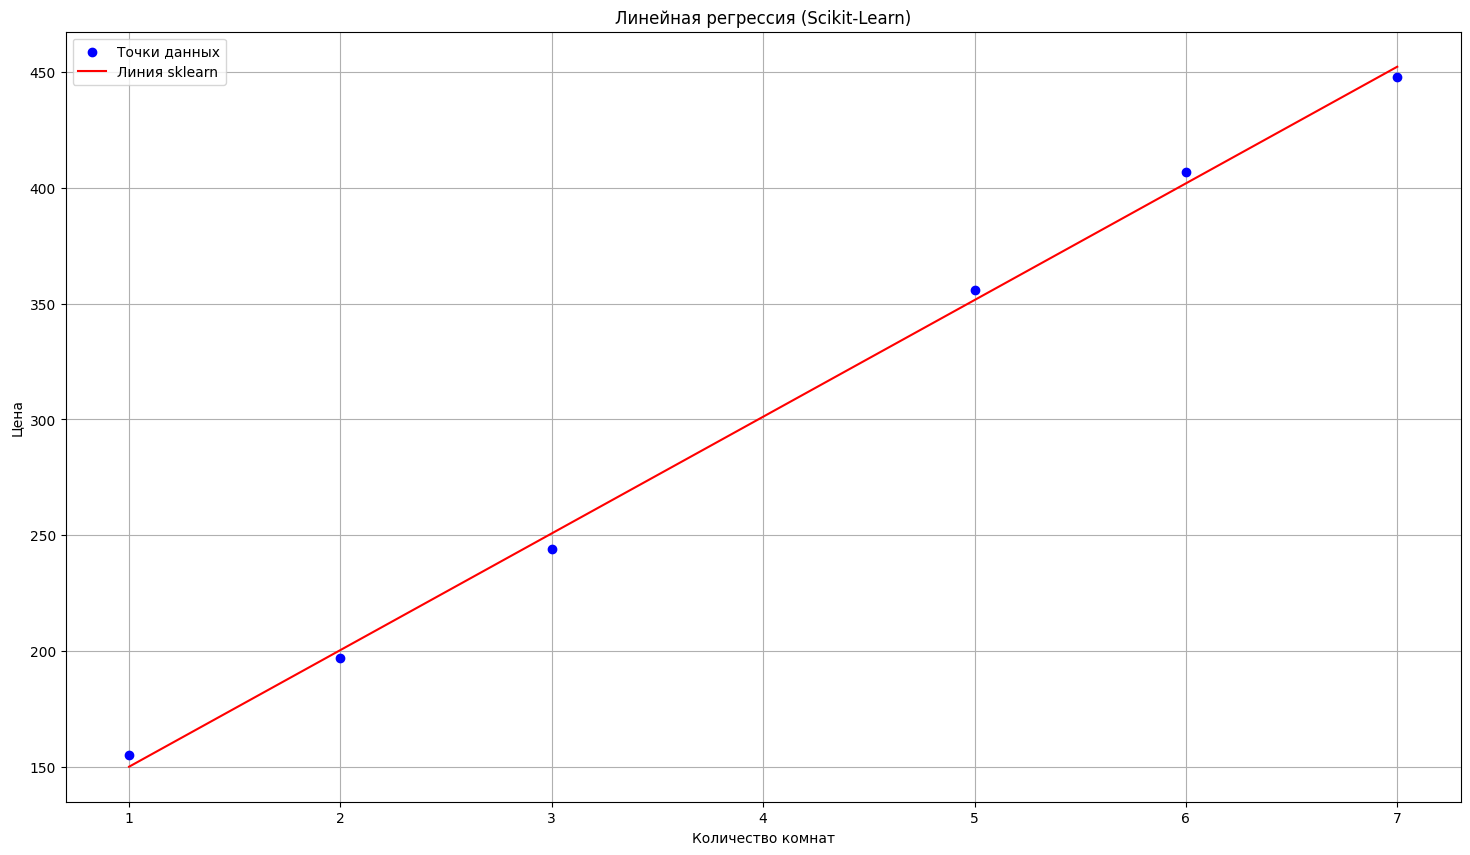

In [25]:
# Визуализация результатов модели scikit-learn
plt.figure(figsize=(18, 10))
plt.scatter(features, labels, color='blue', label='Точки данных', zorder=5)
plt.plot(features, predictions, color='red', label='Линия sklearn')
plt.title("Линейная регрессия (Scikit-Learn)")
plt.xlabel("Количество комнат")
plt.ylabel("Цена")
plt.legend()
plt.grid(True)
plt.show()

# 📊 Сравнение результатов

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
# Создание DataFrame с результатами
results_df = pd.DataFrame(results)

In [28]:
# Функция для построения графика с подписями
def create_bar_chart(data, ax, title):
    """
    Строит график с тремя столбцами для MAE, MSE и RMSE.

    Аргументы:
    - data (DataFrame): данные для построения графика.
    - ax (Axes): ось для отображения графика.
    - title (str): заголовок графика.
    """
    methods = data['Метод']
    mae_values = data['MAE']
    mse_values = data['MSE']
    rmse_values = data['RMSE']

    x = np.arange(len(methods))
    width = 0.25

    # Построение столбцов для MAE, MSE и RMSE
    bars1 = ax.bar(x - width, mae_values, width, label='MAE', color='lightblue')
    bars2 = ax.bar(x, mse_values, width, label='MSE', color='lightgreen')
    bars3 = ax.bar(x + width, rmse_values, width, label='RMSE', color='lightcoral')

    # Добавление подписей над столбцами
    for i in range(len(methods)):
        ax.text(x[i] - width, mae_values.iloc[i] + 1, f'{mae_values.iloc[i]:.2f}', ha='center', va='bottom', fontsize=10)
        ax.text(x[i], mse_values.iloc[i] + 1, f'{mse_values.iloc[i]:.2f}', ha='center', va='bottom', fontsize=10)
        ax.text(x[i] + width, rmse_values.iloc[i] + 1, f'{rmse_values.iloc[i]:.2f}', ha='center', va='bottom', fontsize=10)

    # Настройка осей и заголовка
    ax.set_xlabel('Методы')
    ax.set_ylabel('Значения')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.legend()

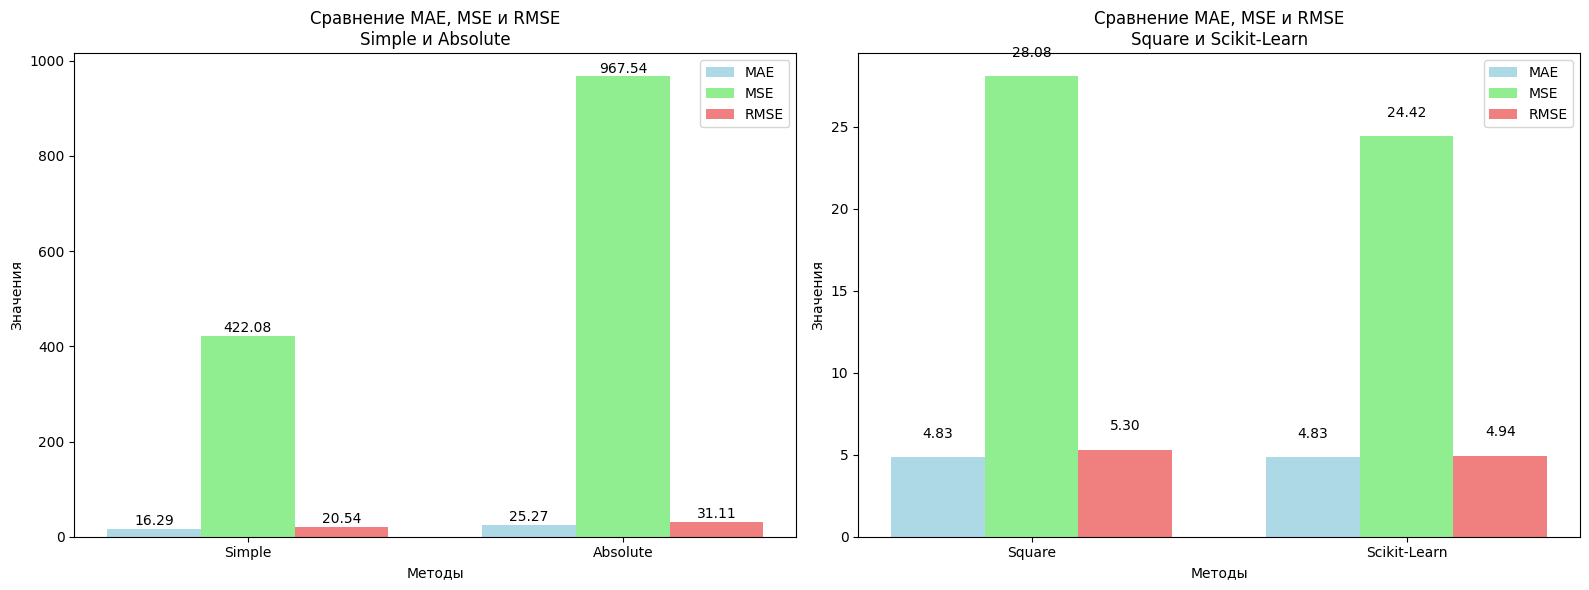

In [29]:
# Фильтрация данных для разных групп методов
first_methods_data = results_df[results_df['Метод'].isin(['Simple', 'Absolute'])].reset_index(drop=True)
second_methods_data = results_df[results_df['Метод'].isin(['Square', 'Scikit-Learn'])].reset_index(drop=True)

# Создание графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Построение первого графика
create_bar_chart(first_methods_data, ax1, 'Сравнение MAE, MSE и RMSE\nSimple и Absolute')

# Построение второго графика
create_bar_chart(second_methods_data, ax2, 'Сравнение MAE, MSE и RMSE\nSquare и Scikit-Learn')

# Настройка и вывод графиков
plt.tight_layout()
plt.show()

> ✅ В результате видно, что квадратичный подход даёт наименьшие значения MSE и RMSE по сравнению с простым и абсолютным подходами.

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

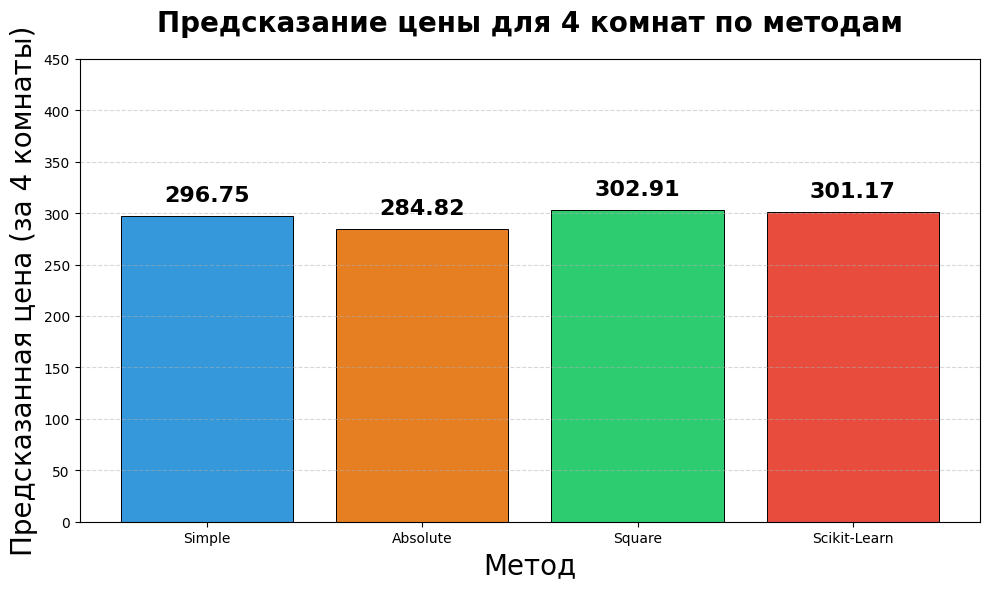

In [31]:
# Цветовая палитра в стиле Seaborn/Flat UI
colors = ['#3498db', '#e67e22', '#2ecc71', '#e74c3c']

# Создание графика
plt.figure(figsize=(10, 6))

# Построение столбчатой диаграммы с закруглением и тенью
bars = plt.bar(
    results_df["Метод"], 
    results_df["Предсказанная цена для 4 комнат"], 
    color=colors, 
    edgecolor='black', 
    linewidth=0.7
)

# Добавление аннотаций прямо над столбцами с более заметным шрифтом
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'{height:.2f}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 8),  # смещение текста
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=16, fontweight='bold', color='black'
    )

# Оформление графика
plt.ylim(0, 450)
plt.title('Предсказание цены для 4 комнат по методам', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Метод', fontsize=20)
plt.ylabel('Предсказанная цена (за 4 комнаты)', fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Показываем график
plt.tight_layout()
plt.show()